In [7]:
# %% [markdown]
# # GDP vs Happiness - Advanced Analysis
# Exploring relationships between economic factors and happiness scores

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data
df = pd.read_csv("../data/cleaned_data.csv")
print(f"Data loaded with {len(df)} countries")
df.head(3)

Data loaded with 135 countries


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,GDP_per_capita
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,94394.510680
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,75121.015228
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,68091.319114


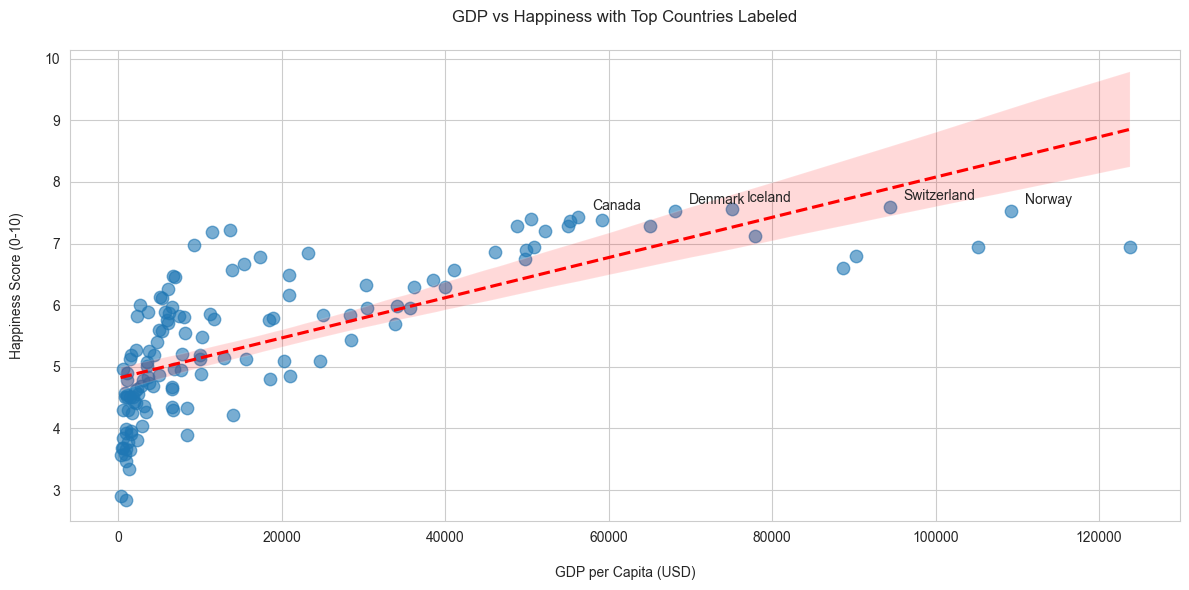

In [8]:
# %% [markdown]
# ## Advanced Visualizations

# %%
# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12,6))

# Scatterplot with regression
ax = sns.regplot(
    x="GDP_per_capita", 
    y="Happiness Score", 
    data=df,
    scatter_kws={'alpha':0.6, 's':80},
    line_kws={'color':'red', 'linestyle':'--'}
)

# Add annotations
top_5 = df.nlargest(5, "Happiness Score")
for i, row in top_5.iterrows():
    ax.annotate(row['Country'], 
                (row['GDP_per_capita'], row['Happiness Score']),
                xytext=(10,5), textcoords='offset points')

plt.title("GDP vs Happiness with Top Countries Labeled", pad=20)
plt.xlabel("GDP per Capita (USD)", labelpad=15)
plt.ylabel("Happiness Score (0-10)", labelpad=15)
plt.tight_layout()
plt.savefig("../figures/final_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

Regression Results:
- Slope (GDP impact): 0.00003
- Intercept: 4.82
- R-squared: 0.511
- Example: $10,000 GDP increase → ▲0.33 happiness points


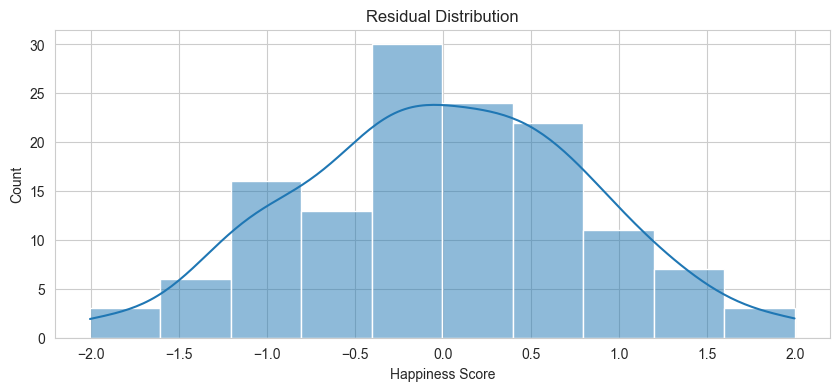

In [9]:
# %% [markdown]
# ## Statistical Analysis

# %%
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data
X = df[["GDP_per_capita"]]
y = df["Happiness Score"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Print results
print("Regression Results:")
print(f"- Slope (GDP impact): {model.coef_[0]:.5f}")
print(f"- Intercept: {model.intercept_:.2f}")
print(f"- R-squared: {model.score(X, y):.3f}")
print(f"- Example: $10,000 GDP increase → ▲{model.coef_[0]*10000:.2f} happiness points")

# Residual analysis
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(10,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [10]:
# %% [markdown]
# ## Country Rankings

# %%
# Top 10 happiest countries
top10 = df.nlargest(10, "Happiness Score")[["Country", "Happiness Score", "GDP_per_capita"]]
top10.style.background_gradient(cmap='Blues')

# Bottom 10 countries
df.nsmallest(10, "Happiness Score")[["Country", "Happiness Score", "GDP_per_capita"]]

,Country,Happiness Score,GDP_per_capita
134,Togo,2.839,898.758154
133,Burundi,2.905,250.634225
132,Benin,3.340,1266.427110
131,Rwanda,3.465,975.469324
130,Afghanistan,3.575,357.261153
129,Burkina Faso,3.587,836.118305
128,Guinea,3.656,1416.596120
127,Chad,3.667,966.036468
126,Central African Republic,3.678,467.359825
125,Madagascar,3.681,503.514533


In [ ]:
# %% [markdown]
# ## Interactive Exploration

# %%
# Install if needed
!pip install plotly --quiet

import plotly.express as px

fig = px.scatter(
    df, 
    x="GDP_per_capita", 
    y="Happiness Score",
    hover_name="Country",
    trendline="ols",
    labels={"GDP_per_capita": "GDP per Capita (USD)"},
    title="Interactive GDP vs Happiness"
)
fig.show()